**Lorenzo's Notebook**

Importing useful packages and modules

In [150]:
from data_collector_client import AnomalyDetectionClient
from telethon.tl.types import MessageReactions
import asyncio
from decouple import config
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [151]:
import re
def reactions_splitting(message):
    pattern = r"emoticon=['\"](.*?)['\"].*?count=(\d+)"
    matches = re.findall(pattern, message)
    if matches:
        return matches
    else:
        return None

In [152]:

# Function to count the number of reactions in a message using the splitted reactions
def count_reactions(splitted_reaction):
    if(splitted_reaction == None):
        return 0
    else:
        tmp = []
        for i in range(len(splitted_reaction)):
            tmp.append(int(splitted_reaction[:][i][1]))
        return sum(tmp)

In [153]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Function to preprocess a message removing stopwords of the specified language and special characters
def preprocess_message(message, language):
  # Removing special characters and \n
  message = re.sub(r"[^\w\s]", "", message)
  message = re.sub(r"\n", "", message)


  # Removing Stopwords
  stop_words = set(stopwords.words(language))
  message = " ".join([word for word in message.split() if word not in stop_words])

  # Convert to lowercase
  message = message.lower()

  # Removing empty words
  message = " ".join(message.split())

  return message

# example
messaggi = ["Ciao a tutti!", "Come va?", "Oggi è una bella giornata\n."]
preprocessed_messages = [preprocess_message(message,"italian") for message in messaggi]
print(preprocessed_messages)


['ciao', 'come va', 'oggi bella giornata']


[nltk_data] Downloading package stopwords to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
df = pd.read_csv('./data/trial.csv')

df['reactions'].fillna('', inplace=True)
df['reactions'] = df['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

In [155]:

ourgroup = "https://t.me/+synza2388S80NWM0"
poligroup = "https://t.me/PoliGruppo"

ourdf = df.loc[df['group'] == ourgroup]

**Laser Embedding**

In [156]:
texts = ourdf['text']
texts = [str(text) for text in texts]
preprocessed_texts = [preprocess_message(str(text), "english") for text in texts]
print("-----NORMAL TEXTS-----")
print(texts[0:5])
print("\n-----PREPROCESSED TEXTS-----")
print(preprocessed_texts[0:5])

print(len(preprocessed_texts))
print(len(texts))


-----NORMAL TEXTS-----
['nan', 'Hi guys', 'Hi', 'Hi😊', 'hey everyone!']

-----PREPROCESSED TEXTS-----
['nan', 'hi guys', 'hi', 'hi', 'hey everyone']
329
329


In [157]:
langs = ["en" for i in range(len(texts))]

from laserembeddings import Laser

laser = Laser()

# if all sentences are in the same language:

embeddings = laser.embed_sentences(
    texts,
    lang=langs)

embeddings.shape

(329, 1024)

In [159]:
def plot_reduced_embeddings_2D(texts, lang):
    langs = [lang for i in range(len(texts))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings = laser.embed_sentences(
    texts,
    lang=langs)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    # Plottare i punti
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    for i, point in enumerate(reduced_embeddings):
        # Annotate each point with the message number
        plt.annotate(str(i + 1), point, ha='center', va='center')

    plt.show()

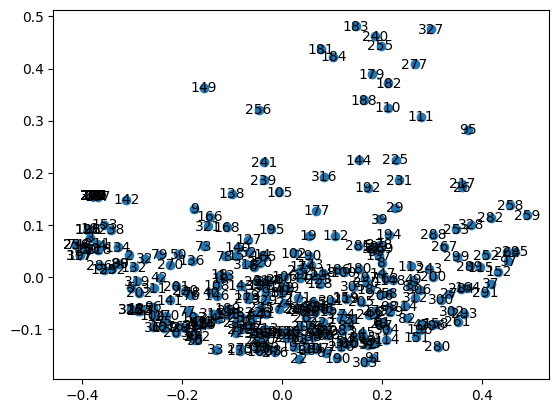

In [160]:
plot_reduced_embeddings_2D(texts, "en")

Now we use the messages of the polinetwork group 

We'll plot the data as we have done before to see if there is any change in the distribution of the messages of two different groups

In [115]:
polidf = df.loc[df['group'] == poligroup]

polidf.head()

,Unnamed: 0,group,sender,text,reply,date,reactions
329,999,https://t.me/PoliGruppo,1.377961e+09,ma ce una sezione si o no?,NaN,2024-03-03 10:24:58+00:00,0
330,998,https://t.me/PoliGruppo,1.265578e+09,Se é per l'Erasmus o per mobilità internaziona...,204165.0,2024-03-03 10:32:32+00:00,0
331,997,https://t.me/PoliGruppo,4.690109e+08,Ci sono delle restrizioni a cosa si può portar...,NaN,2024-03-03 10:34:09+00:00,0
332,996,https://t.me/PoliGruppo,4.282712e+08,Cerca su libgen,204159.0,2024-03-03 10:41:34+00:00,0
333,995,https://t.me/PoliGruppo,6.277756e+08,Da regolamento c'è scritto che sono tassativam...,204167.0,2024-03-03 11:03:14+00:00,0


In [163]:
def plot_and_compare_reduced_embeddings_2D(texts1, texts2, lang1, lang2):
    langs1 = [lang1 for i in range(100)]
    langs2 = [lang2 for i in range(100)]

    from laserembeddings import Laser

    laser = Laser()
#
    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1[0:100],
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2[0:100],
    lang=langs2)

    pca = PCA(n_components=2)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=2)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    # Plottare i punti
    plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], c='b')
    plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], c='r')

    plt.show()

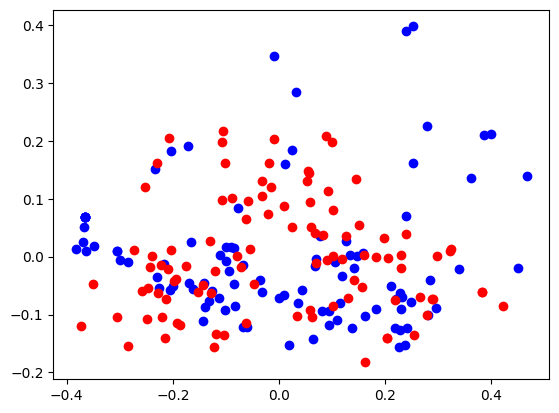

In [164]:
plot_and_compare_reduced_embeddings_2D(texts, polidf['text'], "en", "it")

In [166]:
poli_texts = polidf['text']
poli_texts_strings = [str(text) for text in poli_texts if isinstance(text, str)] 
print(poli_texts_strings[0:5])



['ma ce una sezione si o no?', "Se é per l'Erasmus o per mobilità internazionale c'é l'apposito gruppo", 'Ci sono delle restrizioni a cosa si può portare alla laurea per quanto riguarda coriandoli, botti ecc?', 'Cerca su libgen', "Da regolamento c'è scritto che sono tassativamente vietati i festeggiamenti all'interno del campus. Mi pareva di aver scritto da qualche altra parte di evitare di lasciare sporcizia in giro cordiandoli compresi"]


Try by plotting in the space

In [168]:
def plot_and_compare_reduced_embeddings_3D(texts1, texts2, lang1, lang2, name1, name2):
    langs1 = [lang1 for i in range(100)]
    langs2 = [lang2 for i in range(100)]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1[0:100],
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2[0:100],
    lang=langs2)

    pca = PCA(n_components=3)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=3)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    import plotly.graph_objects as go

    # Importare i dati
    import numpy as np

    # Creare la figura
    fig = go.Figure()

    # Plot each set of points with a unique colormap
    fig.add_scatter3d(
        x=reduced_embeddings1[:, 0],
        y=reduced_embeddings1[:, 1],
        z=reduced_embeddings1[:, 2],
        mode='markers',
        marker=dict(color='blue', size=8),  # Use a color name or hex code for direct coloring
        name=name1
    )

    fig.add_scatter3d(
        x=reduced_embeddings2[:, 0],
        y=reduced_embeddings2[:, 1],
        z=reduced_embeddings2[:, 2],
        mode='markers',
        marker=dict(color='red', size=8),  # Use a different color for this set
        name=name2
    )

    # Aggiungere le legende
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Mostrare il plot
    fig.show()

In [169]:
plot_and_compare_reduced_embeddings_3D(texts, poli_texts_strings, "en", "it", "Our Group", "PoliNetwork Group")

Doing the same as before using the preprocessed texts

In [170]:
preprocessed_texts = [preprocess_message(text, "english") for text in texts]
poli_preprocessed_texts = [preprocess_message(text, "italian") for text in poli_texts_strings]


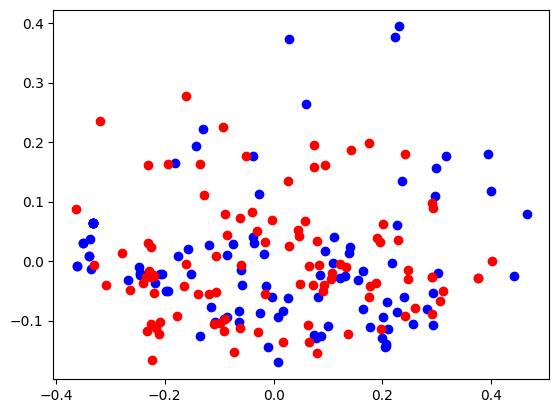

In [171]:
plot_and_compare_reduced_embeddings_2D(preprocessed_texts, poli_preprocessed_texts, "en", "it")

In [172]:
plot_and_compare_reduced_embeddings_3D(preprocessed_texts, poli_preprocessed_texts, "en", "it", "Our Group", "PoliNetwork Group")

**Cosine Similarity**

In [173]:

# Define your two sentences
sentence1 = "This is the first sentence."
sentence2 = "This sentence is very similar to the first one."

# Get the LASER embeddings for the sentences
embedding1 = laser.embed_sentences(
  sentence1,
  lang='en')

embedding2 = laser.embed_sentences(
  sentence2,
  lang='en')



# Calculate cosine similarity
import numpy as np
similarity = np.dot(embedding1[0], embedding2[0]) / (np.linalg.norm(embedding1[0]) * np.linalg.norm(embedding2[0]))

# Print the similarity score
print(f"Cosine similarity between sentences: {similarity:.4f}")


Cosine similarity between sentences: 0.7246


In [174]:
#Return the average cosine similarity between the last k embeddings
def average_k_cosine_similarity(embeddings, k):
    tmp_similarity = []
    for i in np.arange(k-1):
        tmp_similarity.append(np.dot(embeddings[k], embeddings[i]) / (np.linalg.norm(embeddings[k]) * np.linalg.norm(embeddings[i])))
    return np.mean(tmp_similarity)

print(len(embeddings))

similarities = average_k_cosine_similarity(embeddings, 5)

329


In [175]:
print(preprocessed_texts[0:5])
prep_text = preprocessed_texts


['nan', 'hi guys', 'hi', 'hi', 'hey everyone']
['nan', 'Hi guys', 'Hi', 'Hi😊', 'hey everyone!']


In [178]:
laser = Laser()
langs = ['en' for i in range(len(preprocessed_texts))]
embeddings2 = laser.embed_sentences(
  prep_text,
  lang=langs)

323


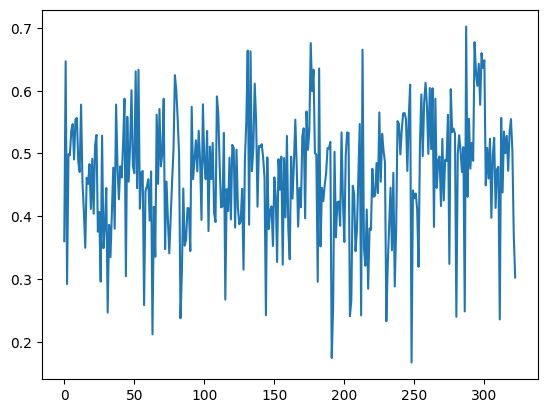

In [195]:
def cosine_similarities_last_k_sliding_window (embeddings2, k):
    trial_similarities = []
    for i in np.arange(0, len(embeddings2)-k):
        window = [emb for emb in embeddings2[i:i+k]]
        trial_similarities.append(average_k_cosine_similarity(window, k-1))
    return trial_similarities

our_group_similarities = cosine_similarities_last_k_sliding_window(embeddings2, 6)

print(len(our_group_similarities))

# Plot the list
plt.plot(our_group_similarities)
plt.show()



In [196]:
def watch_messages_in_a_range(messages, start, end):
    for i in np.arange(start, end+1):
        print(str(i) +" : " + messages[i])

#printing indices where the average similarity of the last k message is below 0.30
indices = [i for i, num in enumerate(our_group_similarities) if num < 0.30]
print(indices)
watch_messages_in_a_range(texts, 20,35)

[2, 26, 31, 57, 63, 83, 115, 144, 181, 191, 192, 204, 205, 212, 217, 230, 236, 248, 280, 286, 311]
20 : I don't know any of them, but I heard that in general professors aren't to strict for this course
21 : I guess we'll find out about it once we have our first meeting with them
22 : But I think that also depends on the amount of work done and its quality (obviously)
23 : Ow, we should setup a meeting then:)
24 : I will send the email now
25 : "Dear MDP team,

Thank you for your message.
I propose to meet on Monday in my office at DEIB bldg. 20, first floor, tel. 3526 at 15.

Please confirm.

Best regards,
Barbara Pernici"
26 : I have a doctor appointment that I cannot miss on Monday afternoon😭 I am available pratically every other time during the week. If it is not possibile to reschedule I can join online, I should finish around 15:15/15:30. I'm really sorry about this inconvenience.
27 : No worries, that's the whole point of these emails, we can try to find another time to schedule 

In [198]:
laser = Laser()
langs = ['it' for i in range(len(poli_preprocessed_texts))]
prep_poli_embeddings = laser.embed_sentences(
  poli_preprocessed_texts,
  lang=langs)

[12, 27, 61, 68, 98, 119, 147, 159, 179, 218, 228, 241, 246, 251, 258, 276, 277, 295, 296, 299, 303, 304, 310, 314, 315, 374, 466, 477, 483, 486, 511, 512, 545, 560, 569, 583, 600, 630, 642, 646, 647, 648, 650, 719, 735, 739, 755, 758, 766, 769, 775, 795, 809, 819, 820, 826, 841, 850, 854, 860, 887, 920, 935, 936, 937, 939, 940, 943, 957, 981, 1003, 1021, 1035, 1042, 1060, 1071, 1098, 1099, 1109, 1110, 1112, 1113, 1121, 1122, 1125, 1126, 1209, 1223, 1276, 1288, 1315, 1319, 1330, 1331, 1336, 1350, 1359, 1378, 1386, 1398, 1399, 1400, 1402, 1444, 1460, 1469, 1477, 1483, 1548, 1592, 1607, 1619, 1625, 1626, 1652, 1665, 1685, 1702, 1712, 1715, 1723, 1726, 1758, 1765, 1781, 1795, 1818, 1823, 1824, 1829, 1833, 1868, 1882, 1889, 1907, 1933, 1948, 1949, 1960, 1961, 1973, 1975, 1987, 1992, 2004, 2005, 2006, 2008, 2022, 2026, 2051, 2061, 2065, 2117, 2120, 2138, 2159, 2185, 2197, 2199, 2209, 2219, 2236, 2238, 2247, 2259, 2278, 2296, 2297, 2303, 2308, 2309, 2334, 2351, 2352, 2356, 2357, 2362, 2375, 

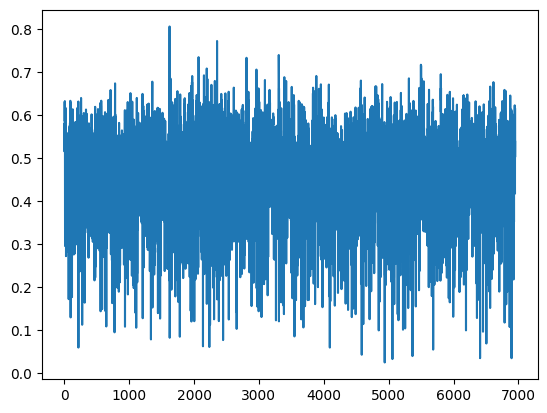

In [201]:
poli_similarities = cosine_similarities_last_k_sliding_window(prep_poli_embeddings, 6)
#printing indices where the average similarity of the last k message is below 0.30
# Plot the list
plt.plot(poli_similarities)
plt.show()

In [203]:
indices = [i for i, num in enumerate(poli_similarities) if num < 0.30]
print(indices)
watch_messages_in_a_range(poli_texts_strings, 20,35)

[12, 27, 61, 68, 98, 119, 147, 159, 179, 218, 228, 241, 246, 251, 258, 276, 277, 295, 296, 299, 303, 304, 310, 314, 315, 374, 466, 477, 483, 486, 511, 512, 545, 560, 569, 583, 600, 630, 642, 646, 647, 648, 650, 719, 735, 739, 755, 758, 766, 769, 775, 795, 809, 819, 820, 826, 841, 850, 854, 860, 887, 920, 935, 936, 937, 939, 940, 943, 957, 981, 1003, 1021, 1035, 1042, 1060, 1071, 1098, 1099, 1109, 1110, 1112, 1113, 1121, 1122, 1125, 1126, 1209, 1223, 1276, 1288, 1315, 1319, 1330, 1331, 1336, 1350, 1359, 1378, 1386, 1398, 1399, 1400, 1402, 1444, 1460, 1469, 1477, 1483, 1548, 1592, 1607, 1619, 1625, 1626, 1652, 1665, 1685, 1702, 1712, 1715, 1723, 1726, 1758, 1765, 1781, 1795, 1818, 1823, 1824, 1829, 1833, 1868, 1882, 1889, 1907, 1933, 1948, 1949, 1960, 1961, 1973, 1975, 1987, 1992, 2004, 2005, 2006, 2008, 2022, 2026, 2051, 2061, 2065, 2117, 2120, 2138, 2159, 2185, 2197, 2199, 2209, 2219, 2236, 2238, 2247, 2259, 2278, 2296, 2297, 2303, 2308, 2309, 2334, 2351, 2352, 2356, 2357, 2362, 2375, 